In [22]:
import pandas as pd

# Load tập dữ liệu winequality-white
data = 'winequality-white.csv'
df = pd.read_csv(data, sep=',')

# Hiển thị thông tin của tập dữ liệu
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [23]:
from sklearn.model_selection import train_test_split

# Tách dữ liệu thành các biến X và y
X = df.drop(['quality'], axis=1)  # Biến X chứa các đặc trưng
y = df['quality']  # Biến y chứa nhãn chất lượng rượu

# Chia dữ liệu thành tập train (80%) và test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
4665,7.3,0.17,0.36,8.20,0.028,44.0,111.0,0.99272,3.14,0.41,12.4
1943,6.3,0.25,0.44,11.60,0.041,48.0,195.0,0.99680,3.18,0.52,9.5
3399,5.6,0.32,0.33,7.40,0.037,25.0,95.0,0.99268,3.25,0.49,11.1
843,6.9,0.19,0.35,1.70,0.036,33.0,101.0,0.99315,3.21,0.54,10.8
2580,7.7,0.30,0.26,18.95,0.053,36.0,174.0,0.99976,3.20,0.50,10.4
...,...,...,...,...,...,...,...,...,...,...,...
4426,6.2,0.21,0.52,6.50,0.047,28.0,123.0,0.99418,3.22,0.49,9.9
466,7.0,0.14,0.32,9.00,0.039,54.0,141.0,0.99560,3.22,0.43,9.4
3092,7.6,0.27,0.52,3.20,0.043,28.0,152.0,0.99129,3.02,0.53,11.4
3772,6.3,0.24,0.29,13.70,0.035,53.0,134.0,0.99567,3.17,0.38,10.6


In [25]:
X_test


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
4656,6.0,0.29,0.41,10.80,0.048,55.0,149.0,0.99370,3.09,0.59,10.966667
3659,5.4,0.53,0.16,2.70,0.036,34.0,128.0,0.98856,3.20,0.53,13.200000
907,7.1,0.25,0.39,2.10,0.036,30.0,124.0,0.99080,3.28,0.43,12.200000
4352,7.3,0.28,0.35,1.60,0.054,31.0,148.0,0.99178,3.18,0.47,10.700000
3271,6.5,0.32,0.34,5.70,0.044,27.0,91.0,0.99184,3.28,0.60,12.000000
...,...,...,...,...,...,...,...,...,...,...,...
3207,6.8,0.21,0.42,1.20,0.045,24.0,126.0,0.99234,3.09,0.87,10.900000
1539,7.3,0.26,0.49,5.00,0.028,32.0,107.0,0.99360,3.24,0.54,10.800000
964,5.9,0.26,0.21,12.50,0.034,36.0,152.0,0.99720,3.28,0.43,9.500000
168,7.5,0.29,0.31,8.95,0.055,20.0,151.0,0.99680,3.08,0.54,9.300000


In [26]:
from sklearn.ensemble import RandomForestClassifier

# Khởi tạo mô hình Random Forest
rfc = RandomForestClassifier(random_state=42)

# Train mô hình trên tập train
rfc.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [27]:
from sklearn.metrics import accuracy_score

# Dự đoán trên tập test
y_pred = rfc.predict(X_test)

# Tính độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác của mô hình: {accuracy:.4f}")


Độ chính xác của mô hình: 0.6898


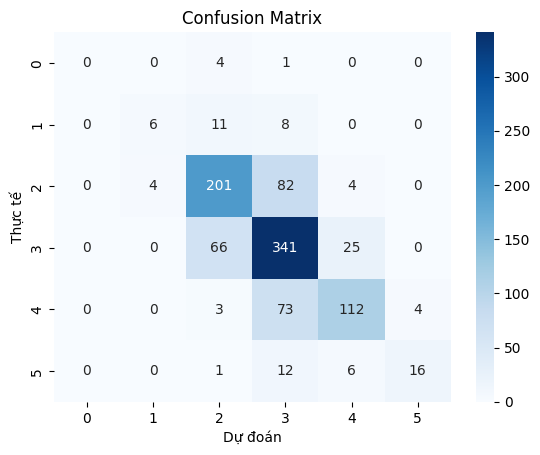

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Hiển thị Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Confusion Matrix')
plt.show()


In [29]:
import pickle

# Lưu mô hình vào file 'model.pkl'
with open('model.pkl', 'wb') as file:
    pickle.dump(rfc, file)  